In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [2]:
# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale = 1./255)
validation_data_gen = ImageDataGenerator(rescale = 1./255)

In [3]:
# preprocess all test images
train_generator = train_data_gen.flow_from_directory('archive/train',
                                                    target_size=(48, 48),
                                                    batch_size=64,
                                                    color_mode="grayscale",
                                                    class_mode="categorical")

# preprocess all train images
validation_generator = validation_data_gen.flow_from_directory('archive/test',
                                                    target_size=(48, 48),
                                                    batch_size=64,
                                                    color_mode="grayscale",
                                                    class_mode="categorical")

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [10]:
# build the model

emotion_model = Sequential()
emotion_model.add(Conv2D(32, kernel_size = (3,3), activation = "relu", input_shape = (48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size = (3,3), activation = "relu"))
emotion_model.add(MaxPooling2D(pool_size = (2,2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size = (3,3), activation = "relu"))
emotion_model.add(MaxPooling2D(pool_size = (2,2)))
emotion_model.add(Conv2D(128, kernel_size = (3,3), activation = "relu"))
emotion_model.add(MaxPooling2D(pool_size = (2,2)))
emotion_model.add(Dropout(0.3))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation = "relu"))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation = "softmax"))

emotion_model.compile(loss = "categorical_crossentropy",
                     optimizer = Adam(learning_rate=0.0001, decay=10**(-6)),
                     metrics = ['accuracy'])


In [11]:
# train the neural network

emotion_model_info = emotion_model.fit_generator(train_generator,
                                                steps_per_epoch=28709//64,
                                                epochs=50,
                                                validation_data=validation_generator,
                                                validation_steps=7178//64)

/Users/stefan/py_38_env/lib/python3.8/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
448/448 [==============================] - 108s 239ms/step - loss: 1.8054 - accuracy: 0.2566 - val_loss: 1.7263 - val_accuracy: 0.3320
Epoch 2/50
448/448 [==============================] - 104s 231ms/step - loss: 1.6461 - accuracy: 0.3553 - val_loss: 1.5606 - val_accuracy: 0.4071
Epoch 3/50
448/448 [==============================] - 100s 222ms/step - loss: 1.5427 - accuracy: 0.4080 - val_loss: 1.4886 - val_accuracy: 0.4395
Epoch 4/50
448/448 [==============================] - 105s 234ms/step - loss: 1.4681 - accuracy: 0.4353 - val_loss: 1.4105 - val_accuracy: 0.4651
Epoch 5/50
448/448 [==============================] - 105s 235ms/step - loss: 1.4050 - accuracy: 0.4674 - val_loss: 1.3472 - val_accuracy: 0.4888
Epoch 6/50
448/448 [==============================] - 102s 227ms/step - loss: 1.3500 - accuracy: 0.4892 - val_loss: 1.3161 - val_accuracy: 0.5040
Epoch 7/50
448/448 [==============================] - 104s 233ms/step - loss: 1.3068 - accuracy: 0.5056 - val_loss: 1.2704 -

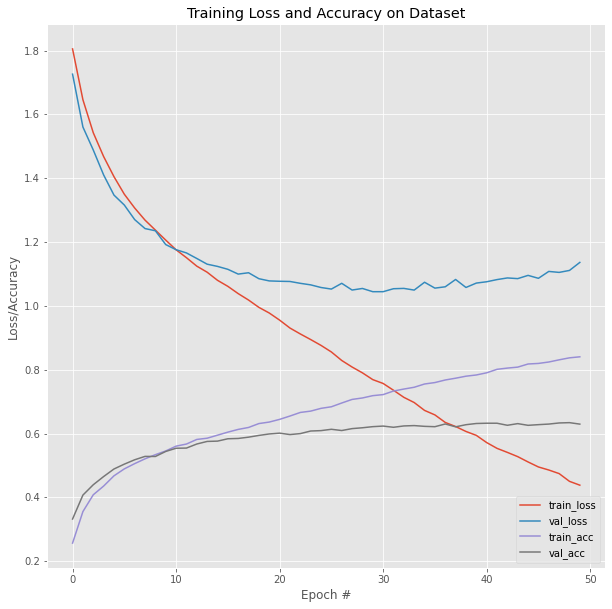

In [13]:
import matplotlib.pyplot as plt

H = emotion_model_info
# plot the training loss and accuracy
N = 50

plt.style.use("ggplot")
plt.figure(figsize=(10,10))
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower right")

In [14]:
model_json = emotion_model.to_json()
with open("emotion_model.json", "w") as json_file:
    json_file.write(model_json)

# save trained model in .h5 file
emotion_model.save_weights('emotion_model.h5')